In [1]:
from datasets import load_dataset

ds = load_dataset("eltorio/ROCOv2-radiology")

/Users/erik.hafnor/.virtualenvs/DAT550/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Calculate the size of the dataset in bytes
train_size_bytes = ds["train"].dataset_size
test_size_bytes = ds["test"].dataset_size if "test" in ds else 0

# Convert to gigabytes
train_size_gb = train_size_bytes / (1024 ** 3)
test_size_gb = test_size_bytes / (1024 ** 3)

print(f"Training dataset size: {train_size_gb:.2f} GB")
print(f"Test dataset size: {test_size_gb:.2f} GB")

Training dataset size: 17.35 GB
Test dataset size: 17.35 GB


In [3]:
#IMPORTS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Print the dataset structure
print(ds)

# Access the training split
print(ds["train"])

# View the first example in the training split
print(ds["train"][0])

DatasetDict({
    train: Dataset({
        features: ['image', 'image_id', 'caption', 'cui'],
        num_rows: 59962
    })
    validation: Dataset({
        features: ['image', 'image_id', 'caption', 'cui'],
        num_rows: 9904
    })
    test: Dataset({
        features: ['image', 'image_id', 'caption', 'cui'],
        num_rows: 9927
    })
})
Dataset({
    features: ['image', 'image_id', 'caption', 'cui'],
    num_rows: 59962
})
{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=682x748 at 0x1575F8290>, 'image_id': 'ROCOv2_2023_train_000001', 'caption': 'Head CT demonstrating left parotiditis.', 'cui': ['C0040405']}


Dataset structure: DatasetDict({
    train: Dataset({
        features: ['image', 'image_id', 'caption', 'cui'],
        num_rows: 59962
    })
    validation: Dataset({
        features: ['image', 'image_id', 'caption', 'cui'],
        num_rows: 9904
    })
    test: Dataset({
        features: ['image', 'image_id', 'caption', 'cui'],
        num_rows: 9927
    })
})
Number of training examples: 59962
Example 1:
Caption: Head CT demonstrating left parotiditis.
Image resolution: (682, 748)
Image format: PNG


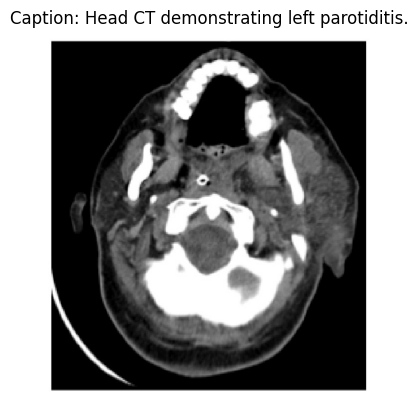

Example 2:
Caption: Acquired renal cysts in end-stage renal failure: 16-year-old girl with Alport syndrome and peritoneal dialysis from the age of 2 years
Image resolution: (307, 224)
Image format: PNG


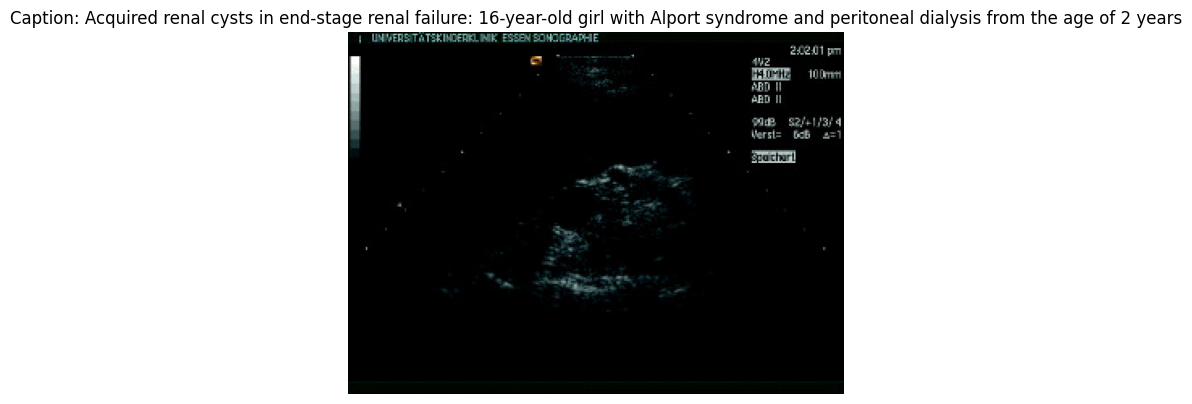

Example 3:
Caption: Computed tomography of the chest showing the right breast nodule with irregular margins
Image resolution: (358, 263)
Image format: PNG


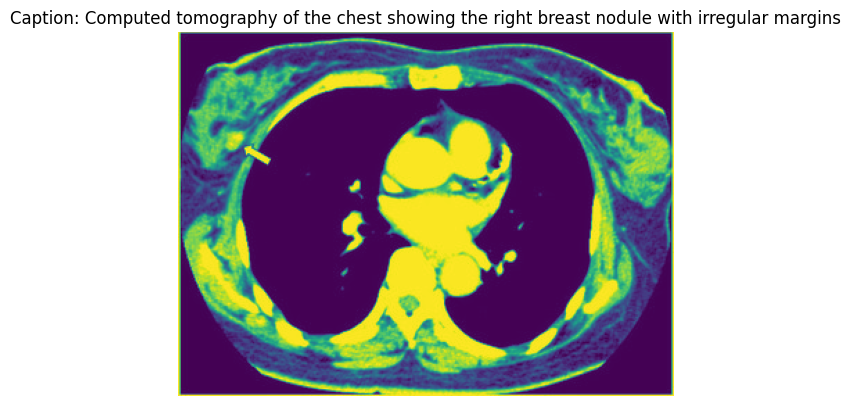

Example 4:
Caption: Lateral view of the sacrum showing the low contrast between bone and soft tissue.
Image resolution: (567, 567)
Image format: PNG


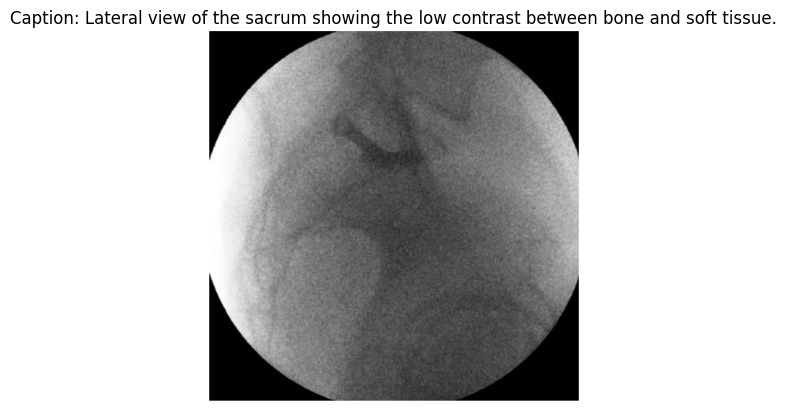

Example 5:
Caption: Thoracic CT scan showing perihilar pulmonary lymphadenomegaly
Image resolution: (600, 512)
Image format: PNG


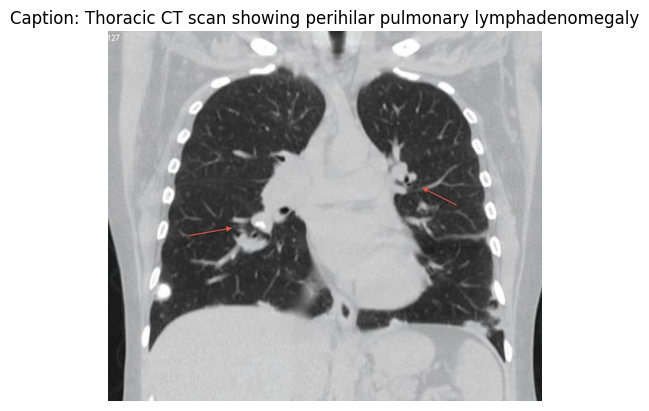

In [5]:
import matplotlib.pyplot as plt

# Print dataset structure
print("Dataset structure:", ds)

# Access the training split
train_data = ds["train"]
print("Number of training examples:", len(train_data))

# Iterate through a few examples to get an overview
for i in range(5):  # Adjust the range as needed
    example = train_data[i]
    image = example["image"]  # Replace "image" with the actual key for images in your dataset
    caption = example["caption"]  # Replace "caption" with the actual key for captions in your dataset

    # Print image details
    print(f"Example {i + 1}:")
    print("Caption:", caption)
    print("Image resolution:", image.size)  # For PIL images
    print("Image format:", image.format)  # For PIL images

    # Visualize the image
    plt.imshow(image)
    plt.title(f"Caption: {caption}")
    plt.axis("off")
    plt.show()

In [ ]:
# Extract image resolutions
resolutions = []
for example in train_data:
    image = example["image"]  # Replace "image" with the actual key for images
    resolutions.append(image.size)  # For PIL images, size returns (width, height)

# Separate width and height
widths = [res[0] for res in resolutions]
heights = [res[1] for res in resolutions]

# Create a DataFrame for plotting
resolution_df = pd.DataFrame({"Width": widths, "Height": heights})

# Scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=resolution_df, x="Width", y="Height", alpha=0.6)
plt.title("Scatter Plot of Image Resolutions")
plt.xlabel("Width")
plt.ylabel("Height")
plt.grid(True)
plt.show()

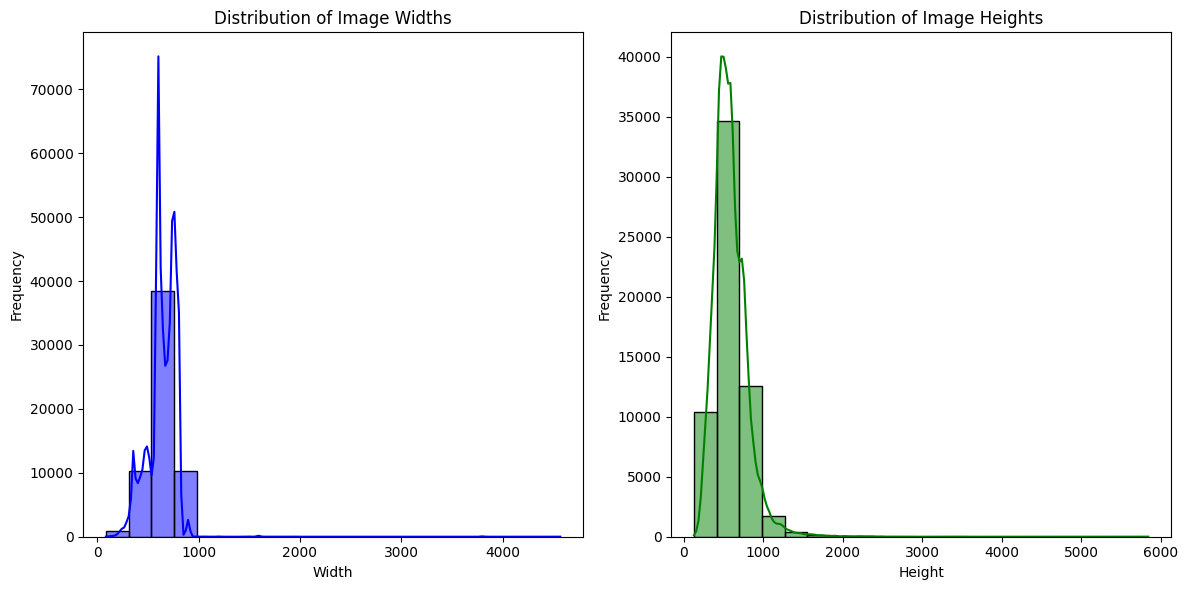

In [12]:
# Plot histograms for widths and heights using Seaborn
plt.figure(figsize=(12, 6))

# Widths
plt.subplot(1, 2, 1)
sns.histplot(widths, bins=20, kde=True, color="blue")
plt.title("Distribution of Image Widths")
plt.xlabel("Width")
plt.ylabel("Frequency")

# Heights
plt.subplot(1, 2, 2)
sns.histplot(heights, bins=20, kde=True, color="green")
plt.title("Distribution of Image Heights")
plt.xlabel("Height")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [13]:
# Check for missing values in the "train" split
missing_values = ds["train"].filter(lambda x: any(v is None for v in x.values()))
print(f"Number of rows with missing values: {len(missing_values)}")

Filter: 100%|██████████| 59962/59962 [04:30<00:00, 221.94 examples/s]

Number of rows with missing values: 0


In [14]:
# Check for duplicates based on specific keys (e.g., "image" and "caption")
unique_train = ds["train"].filter(lambda x: x["image"] is not None and x["caption"] is not None)
print(f"Number of unique rows: {len(unique_train)}")

Filter: 100%|██████████| 59962/59962 [04:29<00:00, 222.41 examples/s]

Number of unique rows: 59962


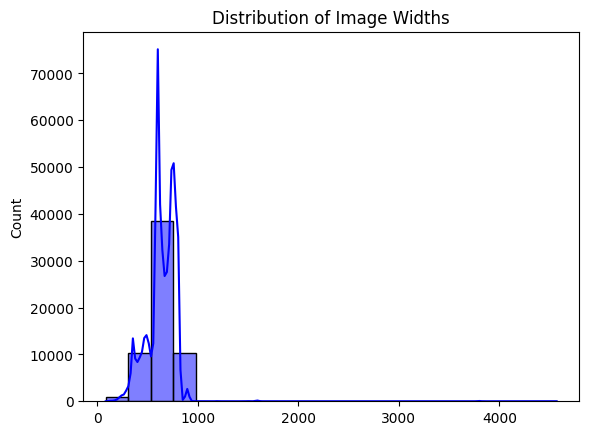

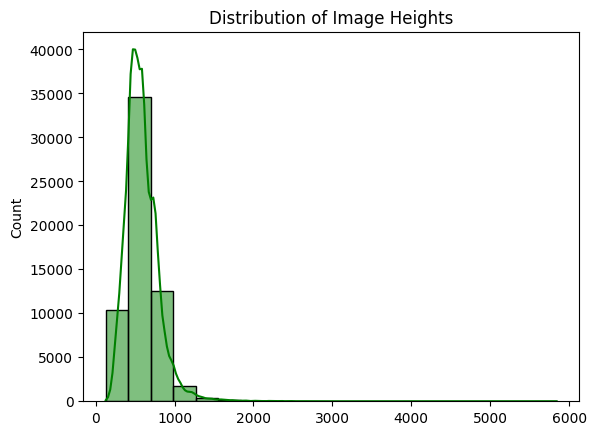

In [15]:
# Extract image resolutions
resolutions = [example["image"].size for example in ds["train"]]  # Replace "image" with the correct key
widths = [res[0] for res in resolutions]
heights = [res[1] for res in resolutions]

# Plot distributions
sns.histplot(widths, bins=20, kde=True, color="blue")
plt.title("Distribution of Image Widths")
plt.show()

sns.histplot(heights, bins=20, kde=True, color="green")
plt.title("Distribution of Image Heights")
plt.show()